# Phase 3 Code Challenge Review

Made using resources from the Seattle team - thanks y'all.

## Overview

* Gradient Descent
* Logistic Regression
* Classification Metrics
* Decision Trees

In [93]:
# Imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, RocCurveDisplay, roc_curve, auc

In [94]:
# from src.call import call_on_students

## Part 1: Gradient Descent

### Set Up

In [95]:
# Grab the data from 'auto-mpg.csv'
mpg_df = pd.read_csv("data/auto-mpg.csv")

In [96]:
# Explore the data
mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


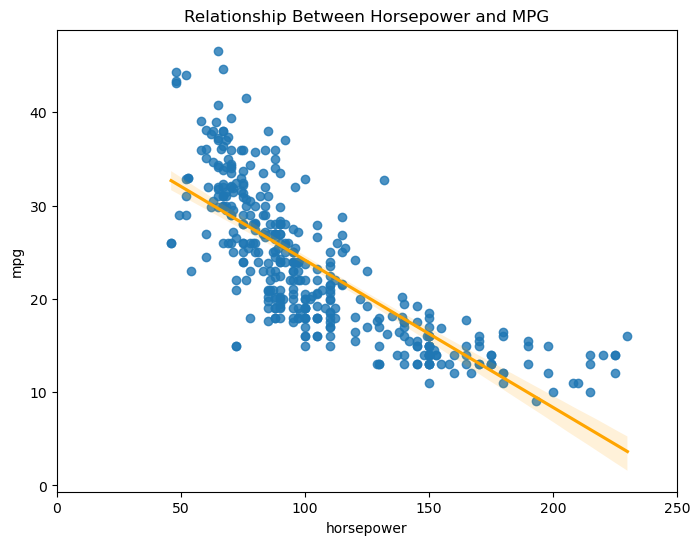

In [97]:
# Let's plot a simple linear regression line using just the horsepower column
plt.figure(figsize=(8, 6))
sns.regplot(x='horsepower', y='mpg', data=mpg_df, line_kws={"color":"orange"})
plt.title('Relationship Between Horsepower and MPG')
plt.xlim(0, 250)
plt.show()

The above graph shows an approximate best fit line for the relationship between `horsepower` and `mpg` in our data.


### 1) Describe the below chart: What is it showing? What does it tell us?

![Slope-RSS relationship image](images/slope-rss-relationship.png)

#### Answer: 

- This is a graph of all of the potential slopes our line of best fit could have. We know that the lowest point on the parabola will have the lowest RSS, and therefore we the best slope. 

- To find that point, we will use gradient descent. 


### 2) Imagine that you're starting at a slope towards the top upper left corner. Using Zoom's annotate feature, demonstrate how gradient descent would work 

- larger steps towards the top, smaller steps as we get closer to the lowest point. (where m = 0) 

### 3) What is a step size when talking about gradient descent? How does learning rate regulate step size?

#### Answer: 

- Step size is how far the graident descent will descend on a model before checking the slop and making the next step. 

- A high learning rate means we take smaller steps, which takes more time and computational power. A slow learning rate will take larger steps, which can 'overshoot' the target and be innacurate. 


## Part 2: Logistic Regression

### 4) Describe a logistic regression model:

- What kind of target is a logistic regression model used for?
- What are the predictions that a logistic regression model outputs?
- How is it different from linear regression?
- Is it a parametric or non-parametric model?

#### Answer: 

- Logistic regression is a classification model. 

- It outputs the category that a target is most likely to be based on the training model: ie, 'based on the petal size, this flower is likely a daisy, rather than a sunflower.'

- Linear regression helps us predict future values, logistic regression helps categorize future data based on the current data. 

- It is a parametric model as it is based on statistical data and returns coefficients.



### 5) Compare a logistic regression model to any of the other model types we've learned:

- List one benefit of logistic regression when compared to the other model type
- List one reason the other model type might be more useful

#### Answer: 

- Logistic Regression and Decision trees can both be classification models. 

- Logistic regression is parametric, Decision Trees are not. 

- Logistic regression is good at binary classifications. Decision trees are good at classifing larget data sets based on features. 

- Both can determine the likelyhood of a feature being a specific thing (aka daisy or sunfloer)


## Part 3: Logistic Regression and Classification Metrics with Code

### Set Up

In [98]:
# Let's use the same data, but now with a classification target
mpg_class = pd.read_csv('data/auto-mpg-classification.csv')

In [99]:
# Check this new dataframe out
mpg_class.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,target
0,8,307.0,130,3504,12.0,70,1,0
1,8,350.0,165,3693,11.5,70,1,1
2,8,318.0,150,3436,11.0,70,1,0
3,8,304.0,150,3433,12.0,70,1,1
4,8,302.0,140,3449,10.5,70,1,1


### 6) Prepare our data for modeling:

1. Perform a train/test split
2. Scale the inputs


In [100]:
# Train-test split
# Set test_size=0.33 and random_state=42

X = mpg_class.drop(columns='target')
y = mpg_class['target']
X_train, X_test, y_train, Y_test = train_test_split(X,y,random_state=42, test_size=0.5)


In [101]:
# Scale the data

mpg_scaler = StandardScaler()
X_train_sclaed = mpg_scaler.fit_transform(X_train)
X_test_scaled = mpg_scaler.transform(X_test)


### 7) Explore the `target` column and our model-less baseline

1. What is the breakdown of the `target` column in our training data?
2. What would a model-less baseline look like in this context?
3. How accurate would that model-less understanding be on our test data?

In [102]:
# call_on_students(1)

#### Part 1: explore the target column breakdown in train data

In [103]:
# Code to explore
y_train.value_counts(normalize=True)

target
0    0.744275
1    0.255725
Name: proportion, dtype: float64

#### Answer:

- Imbalanced target - 74% of training data is in class 0


#### Part 2: What would a model-less baseline look like in this context?

#### Answer:

- Predicting only our majority class, 0


#### Part 3: How accurate would that baseline be on test data?


In [104]:
# Code to find the answer
Y_test.value_counts(normalize=True)

target
0    0.753846
1    0.246154
Name: proportion, dtype: float64

#### Answer:

- It would be wrong ~25% of the time


### 8) What is one problem you could foresee based on this breakdown, and what is one strategy you could employ to address that problem?

In [105]:
# call_on_students(1)

#### Answer:

- Target is imbalanced
- Oversampling, synthetic oversampling (SMOTE), set `class_weight`
- Note that undersampling doesn't make sense here, since our dataset is so small

### 9) Fit a logistic regression model, and plot a confusion matrix of the results on our test set

In [106]:
# call_on_students(1)

In [107]:
# Fit a logistic regression model
# Name the model `logreg` and set random_state = 42
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_sclaed, y_train)

LogisticRegression(random_state=42)

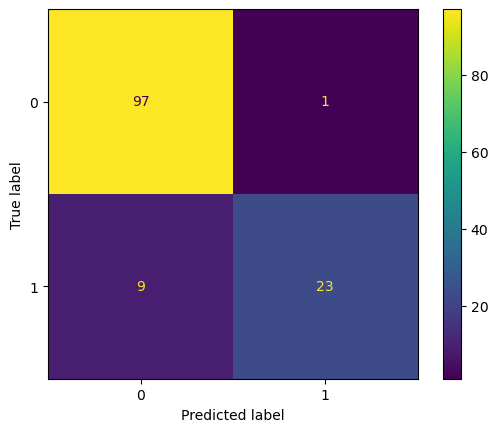

In [108]:
# Plot a confusion matrix on the test data

#predict y
y_predict = logreg.predict(X_test_scaled)

cm = confusion_matrix(Y_test, y_predict, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels=logreg.classes_)

disp.plot()


### 10) Calculate the accuracy, precision, recall and f1-score for the test set

You can use the confusion matrix above, or sklearn functions

In [109]:
true_neg = cm[0, 0]
false_pos = cm[0, 1]
false_neg = cm[1, 0]
true_pos = cm[1, 1]

classification_report(Y_test, y_predict)

'              precision    recall  f1-score   support\n\n           0       0.92      0.99      0.95        98\n           1       0.96      0.72      0.82        32\n\n    accuracy                           0.92       130\n   macro avg       0.94      0.85      0.89       130\nweighted avg       0.93      0.92      0.92       130\n'

In [110]:
# Accuracy
acc = (true_pos+true_neg) / (true_pos+true_neg+false_neg+false_pos)
acc

np.float64(0.9230769230769231)

In [111]:
# Precision
prec = true_pos / (true_pos+false_pos)
prec

np.float64(0.9583333333333334)

In [112]:
# Recall
recall = true_pos / (true_pos+false_neg)
recall

np.float64(0.71875)

In [113]:
# F1-Score
f1 = (2 * prec * recall) / (prec+recall)
f1

np.float64(0.8214285714285714)

### 11) Calculate the ROC-AUC on the test set, and plot the ROC curve

For this you'll definitely want to use the sklearn functions!

In [114]:
# call_on_students(1)

In [115]:
# Calculate roc-auc
test_probas = logreg.predict_proba(X_test_scaled)[:,1]

aoc = roc_auc_score(Y_test, test_probas)
aoc

np.float64(0.9811862244897959)

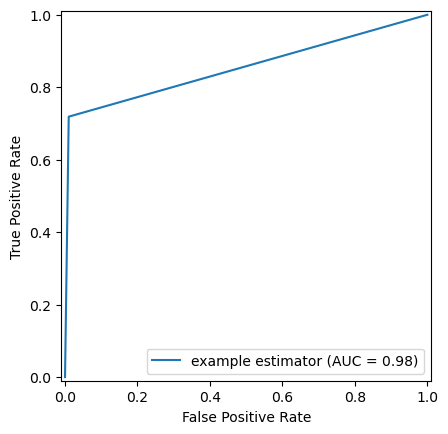

In [116]:
# Plot the ROC curve
fpr_log, tpr_log, thresholds_log = roc_curve(Y_test, y_predict)
roc_auc = auc(fpr_log, tpr_log)
display = RocCurveDisplay(fpr=fpr_log, tpr=tpr_log, roc_auc=aoc,
                                  estimator_name='example estimator')
display.plot()
plt.show()

### 12) Evaluate! Based on the metrics of our test data, how is our model doing?

In [117]:
# call_on_students(1)

#### Answer:

- 


## Part 4: Decision Trees

### Set Up - Generating 1-split trees to compare

In [118]:
# Creating two different decision trees with a single split
dt_maxdepth1_v1 = DecisionTreeClassifier(max_depth=1, random_state = 42)
dt_maxdepth1_v2 = DecisionTreeClassifier(max_depth=1, random_state = 42)

# Training the two trees on different columns
dt_maxdepth1_v1.fit(X_train[['weight']], y_train)
dt_maxdepth1_v2.fit(X_train[['origin']], y_train)

DecisionTreeClassifier(max_depth=1, random_state=42)

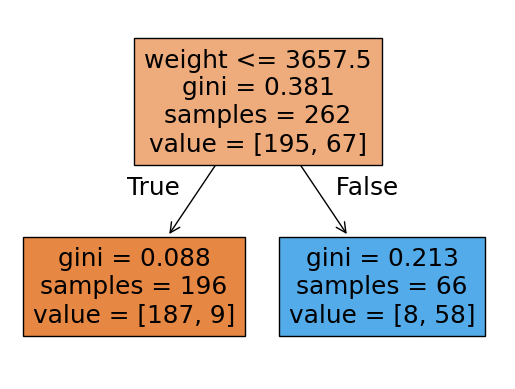

In [119]:
# Tree based on 1st column
plot_tree(dt_maxdepth1_v1, feature_names=['weight'], filled=True);

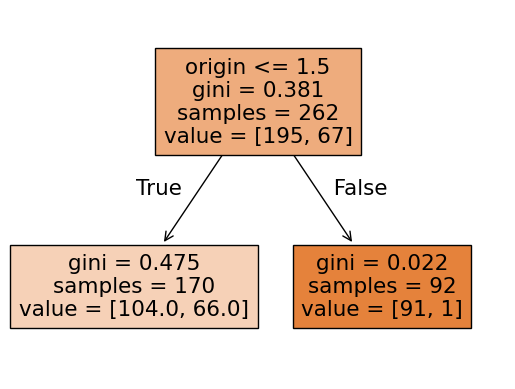

In [120]:
# Tree based on 2nd column
plot_tree(dt_maxdepth1_v2, feature_names=['origin'], filled=True);

#### Result: 

(showing the image output incase there is a problem with the above code to generate and visualize these trees)

| Version 1: Weight | Version 2: Origin |
| ----------------- | ----------------- |  
| ![max depth 1 - version 1](images/dt-maxdepth1-v1.png) | ![max depth 1 - version 2](images/dt-maxdepth1-v2.png) |

### 13) Which of these trees does a better job splitting the data? How can you tell?

In [121]:
# call_on_students(1)

#### Answer:

-  1 : lower gigi


### 14) Fit a decision tree model, and plot a confusion matrix of the results on our test set

In [122]:
# call_on_students(1)

In [123]:
# Fit a decision tree model
# Name the model `dt` and set random_state = 42
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_sclaed, y_train)

DecisionTreeClassifier(random_state=42)

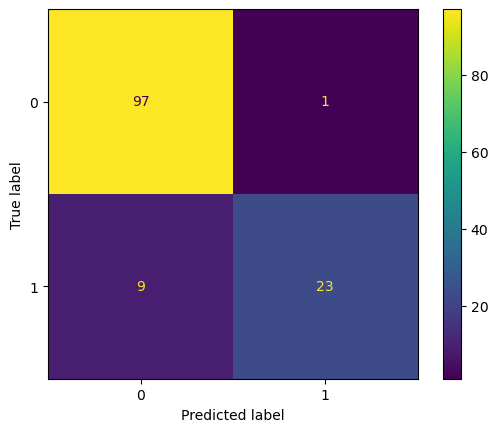

In [124]:
# Plot a confusion matrix on the test data
y_predict_dt = dt.predict(X_test_scaled)

cm = confusion_matrix(Y_test, y_predict, labels=dt.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels=dt.classes_)

disp.plot()

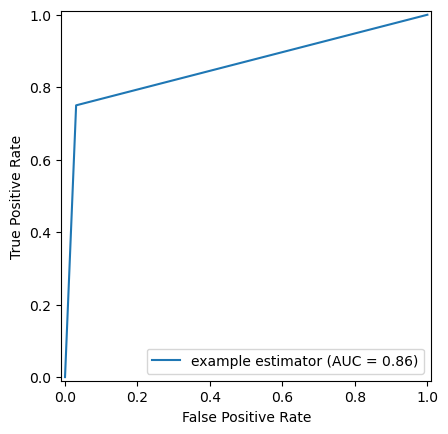

In [125]:
fpr, tpr, thresholds = roc_curve(Y_test, y_predict_dt)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='example estimator')
display.plot()
plt.show()

### 15) Which is the better model according to ROC-AUC score? How can you tell?

In [126]:
dt_probas = dt.predict_proba(X_test_scaled)[:,1]

aoc = roc_auc_score(Y_test, dt_probas)
aoc

np.float64(0.8596938775510203)

#### Answer:

- Log Reg = closer to one
